In [1]:
pip install ultralytics==8.2.103 roboflow ipython torch numpy matplotlib opencv-python-headless Pillow PyYAML

In [2]:
!nvidia-smi

Fri Oct 24 15:45:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
from IPython import display
display.clear_output()
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.1/112.6 GB disk)


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image

In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="EZfmTZ1rgUgTTwoGpsUc")
project = rf.workspace("trialproject").project("deteccao-de-falhas-em-pecas-yc0wg")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Detecção-de-Falhas-Em-Peças-1 in yolov8:: 100%|██████████| 342/342 [00:00<00:00, 3180.06it/s]


In [7]:
%cd {HOME}
!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=40 imgsz=640

/content
100% 22.8M/22.8M [00:00<00:00, 38.5MB/s]
New https://pypi.org/project/ultralytics/8.3.221 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/Detecção-de-Falhas-Em-Peças-1/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnost

/content


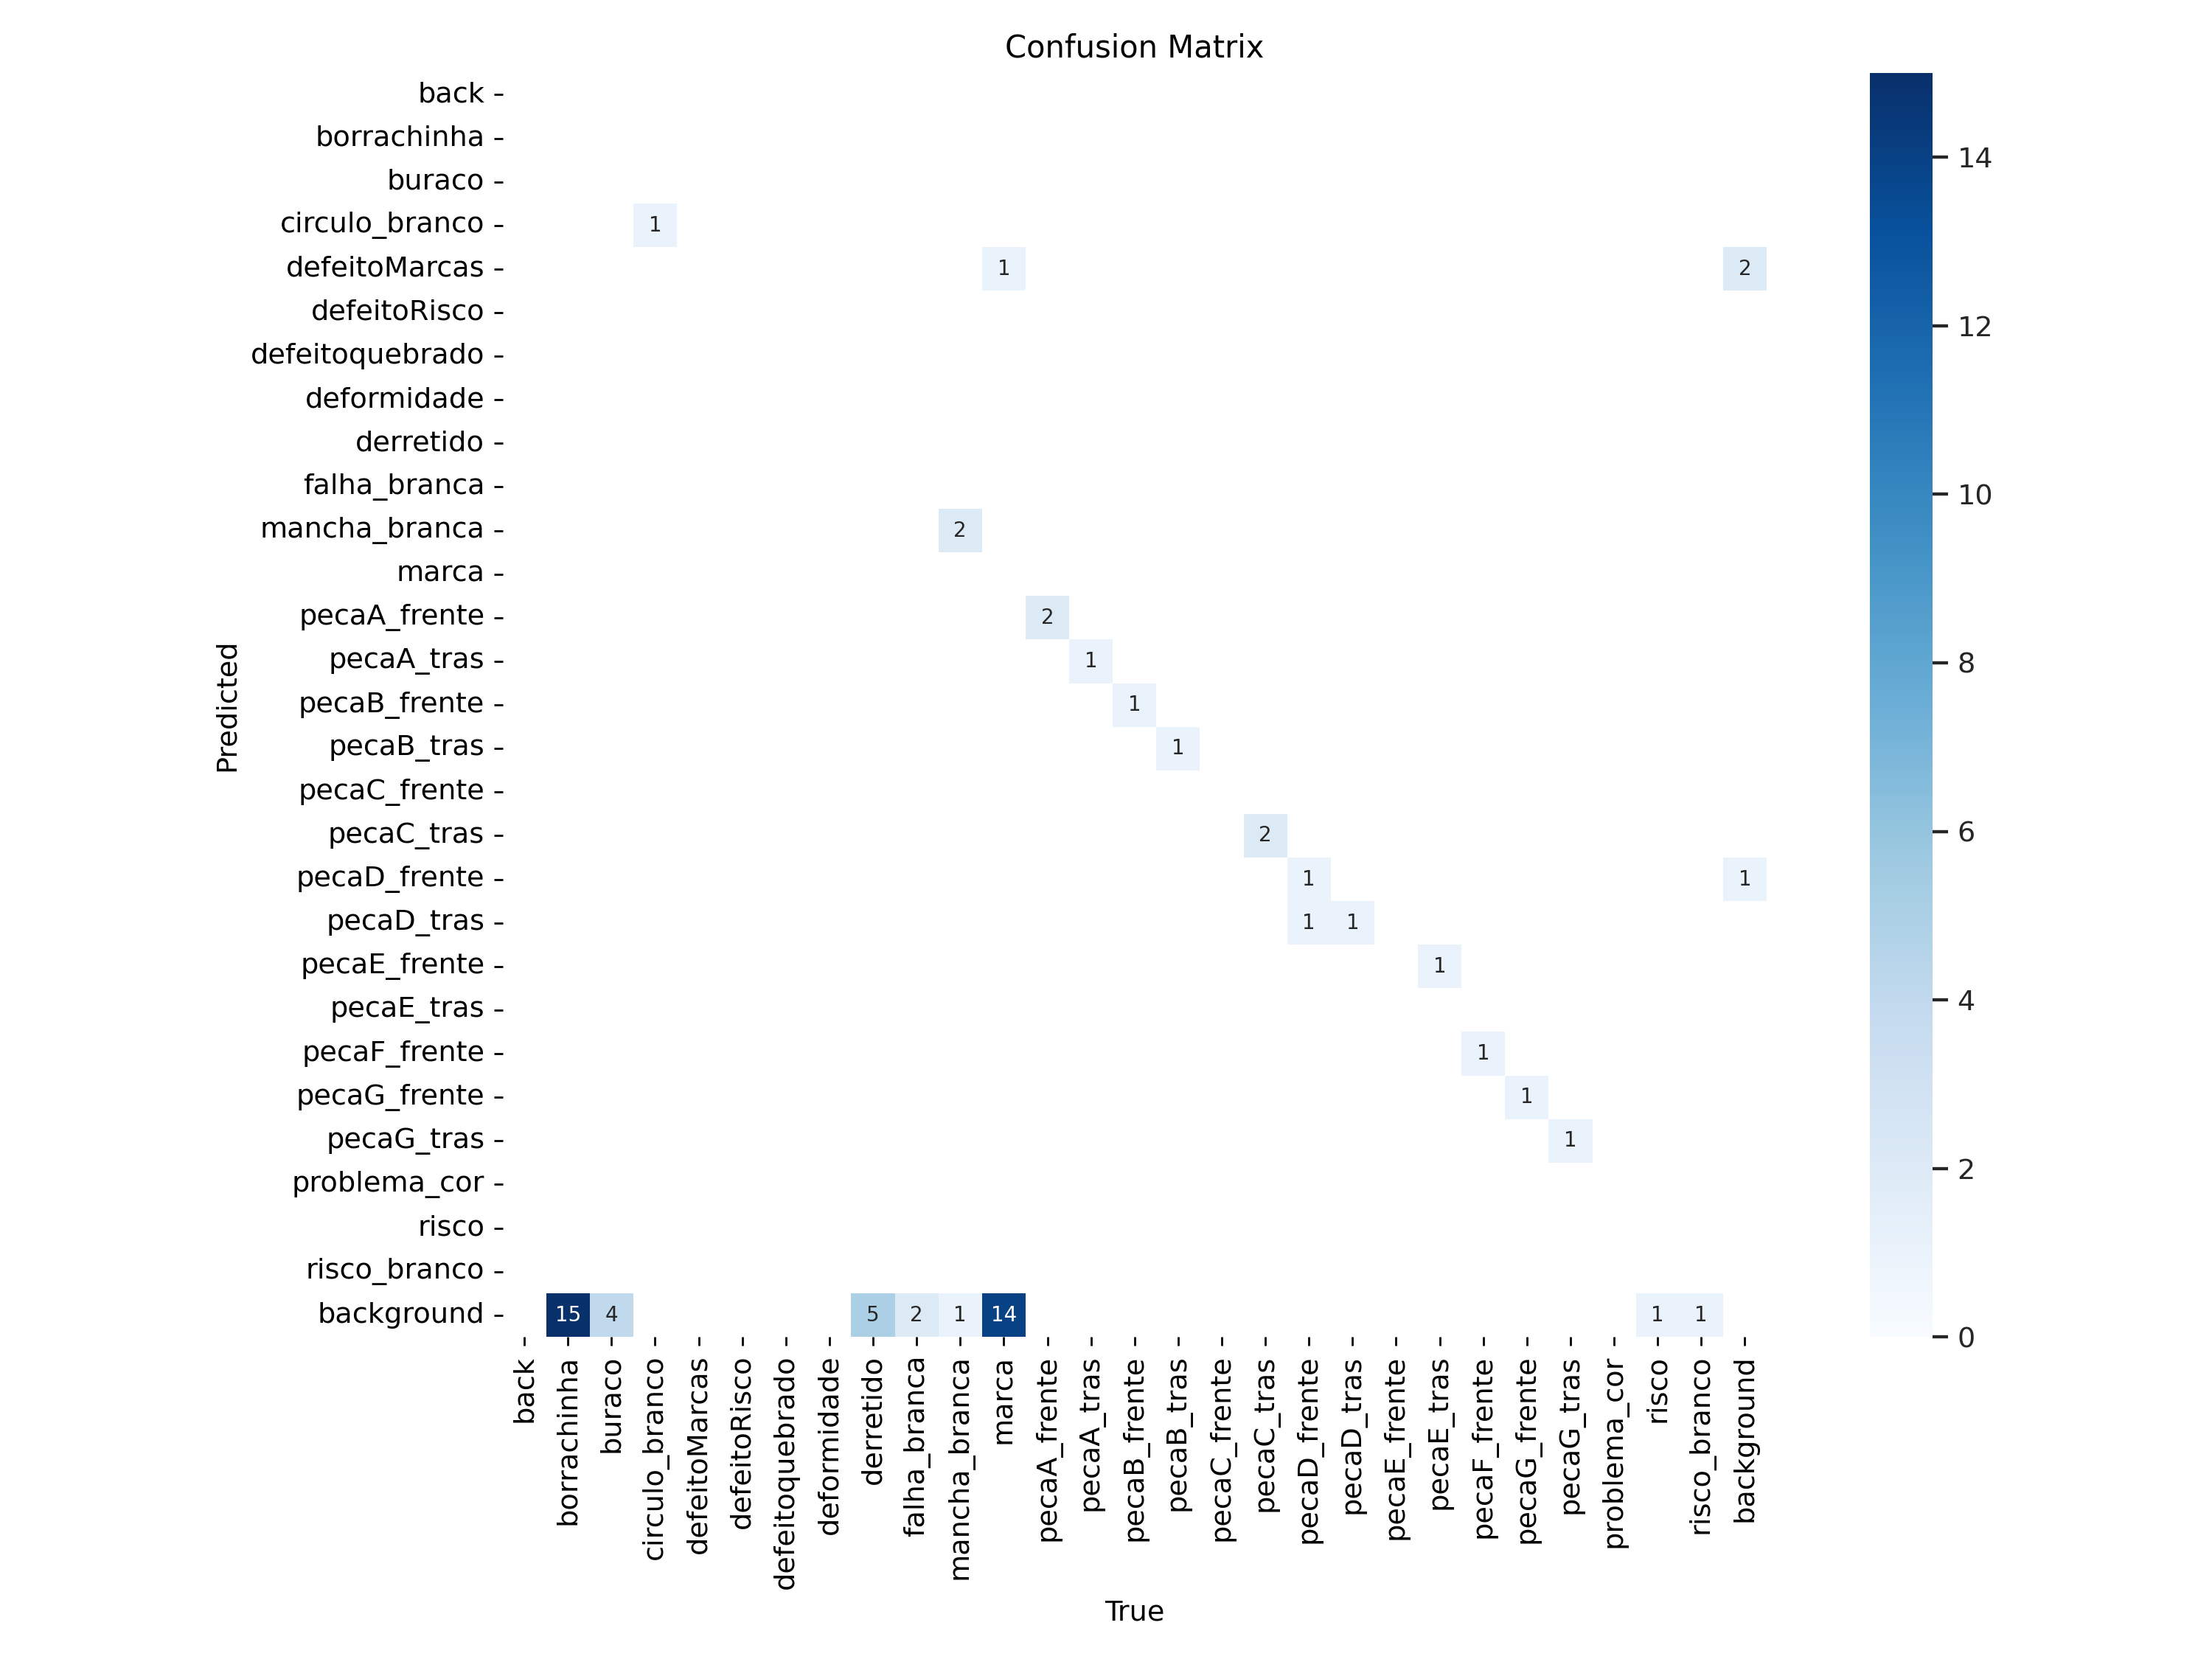

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


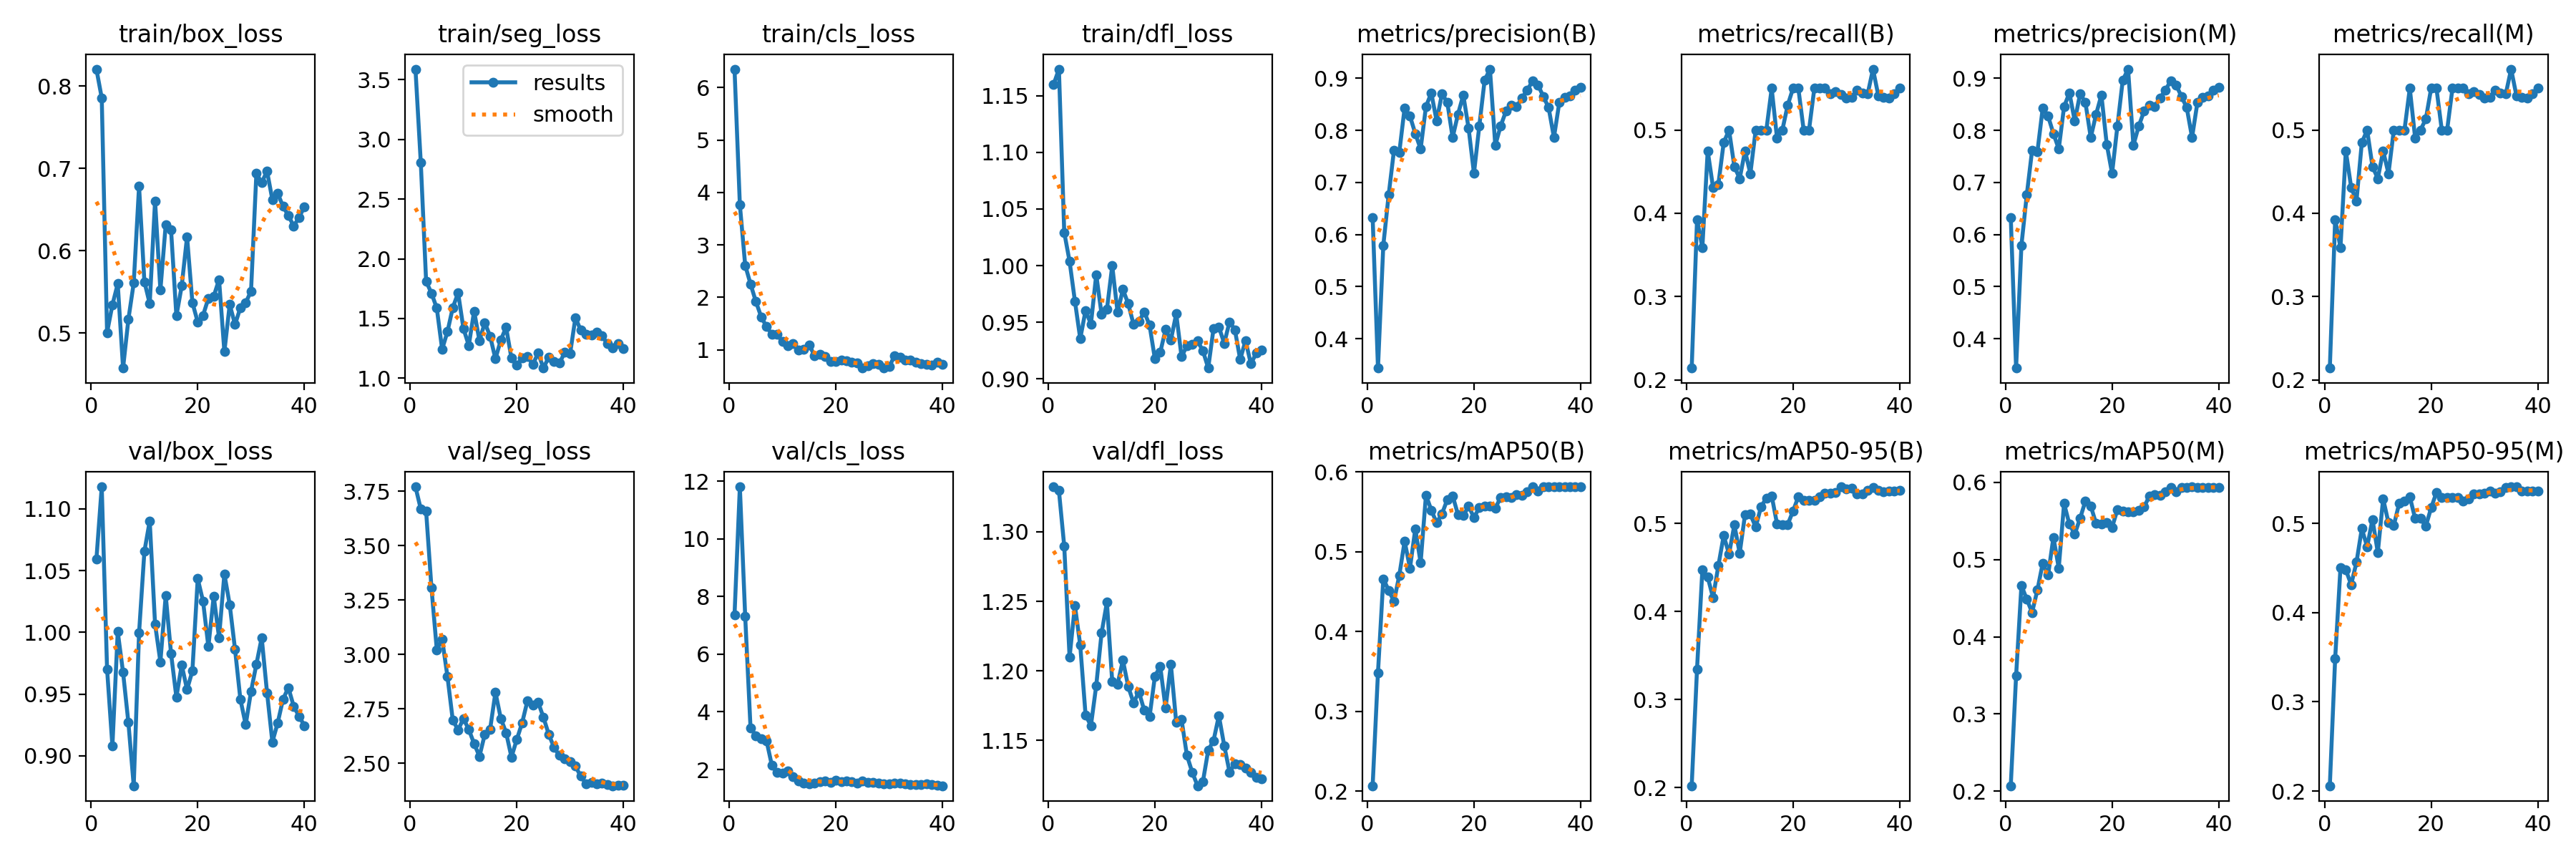

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


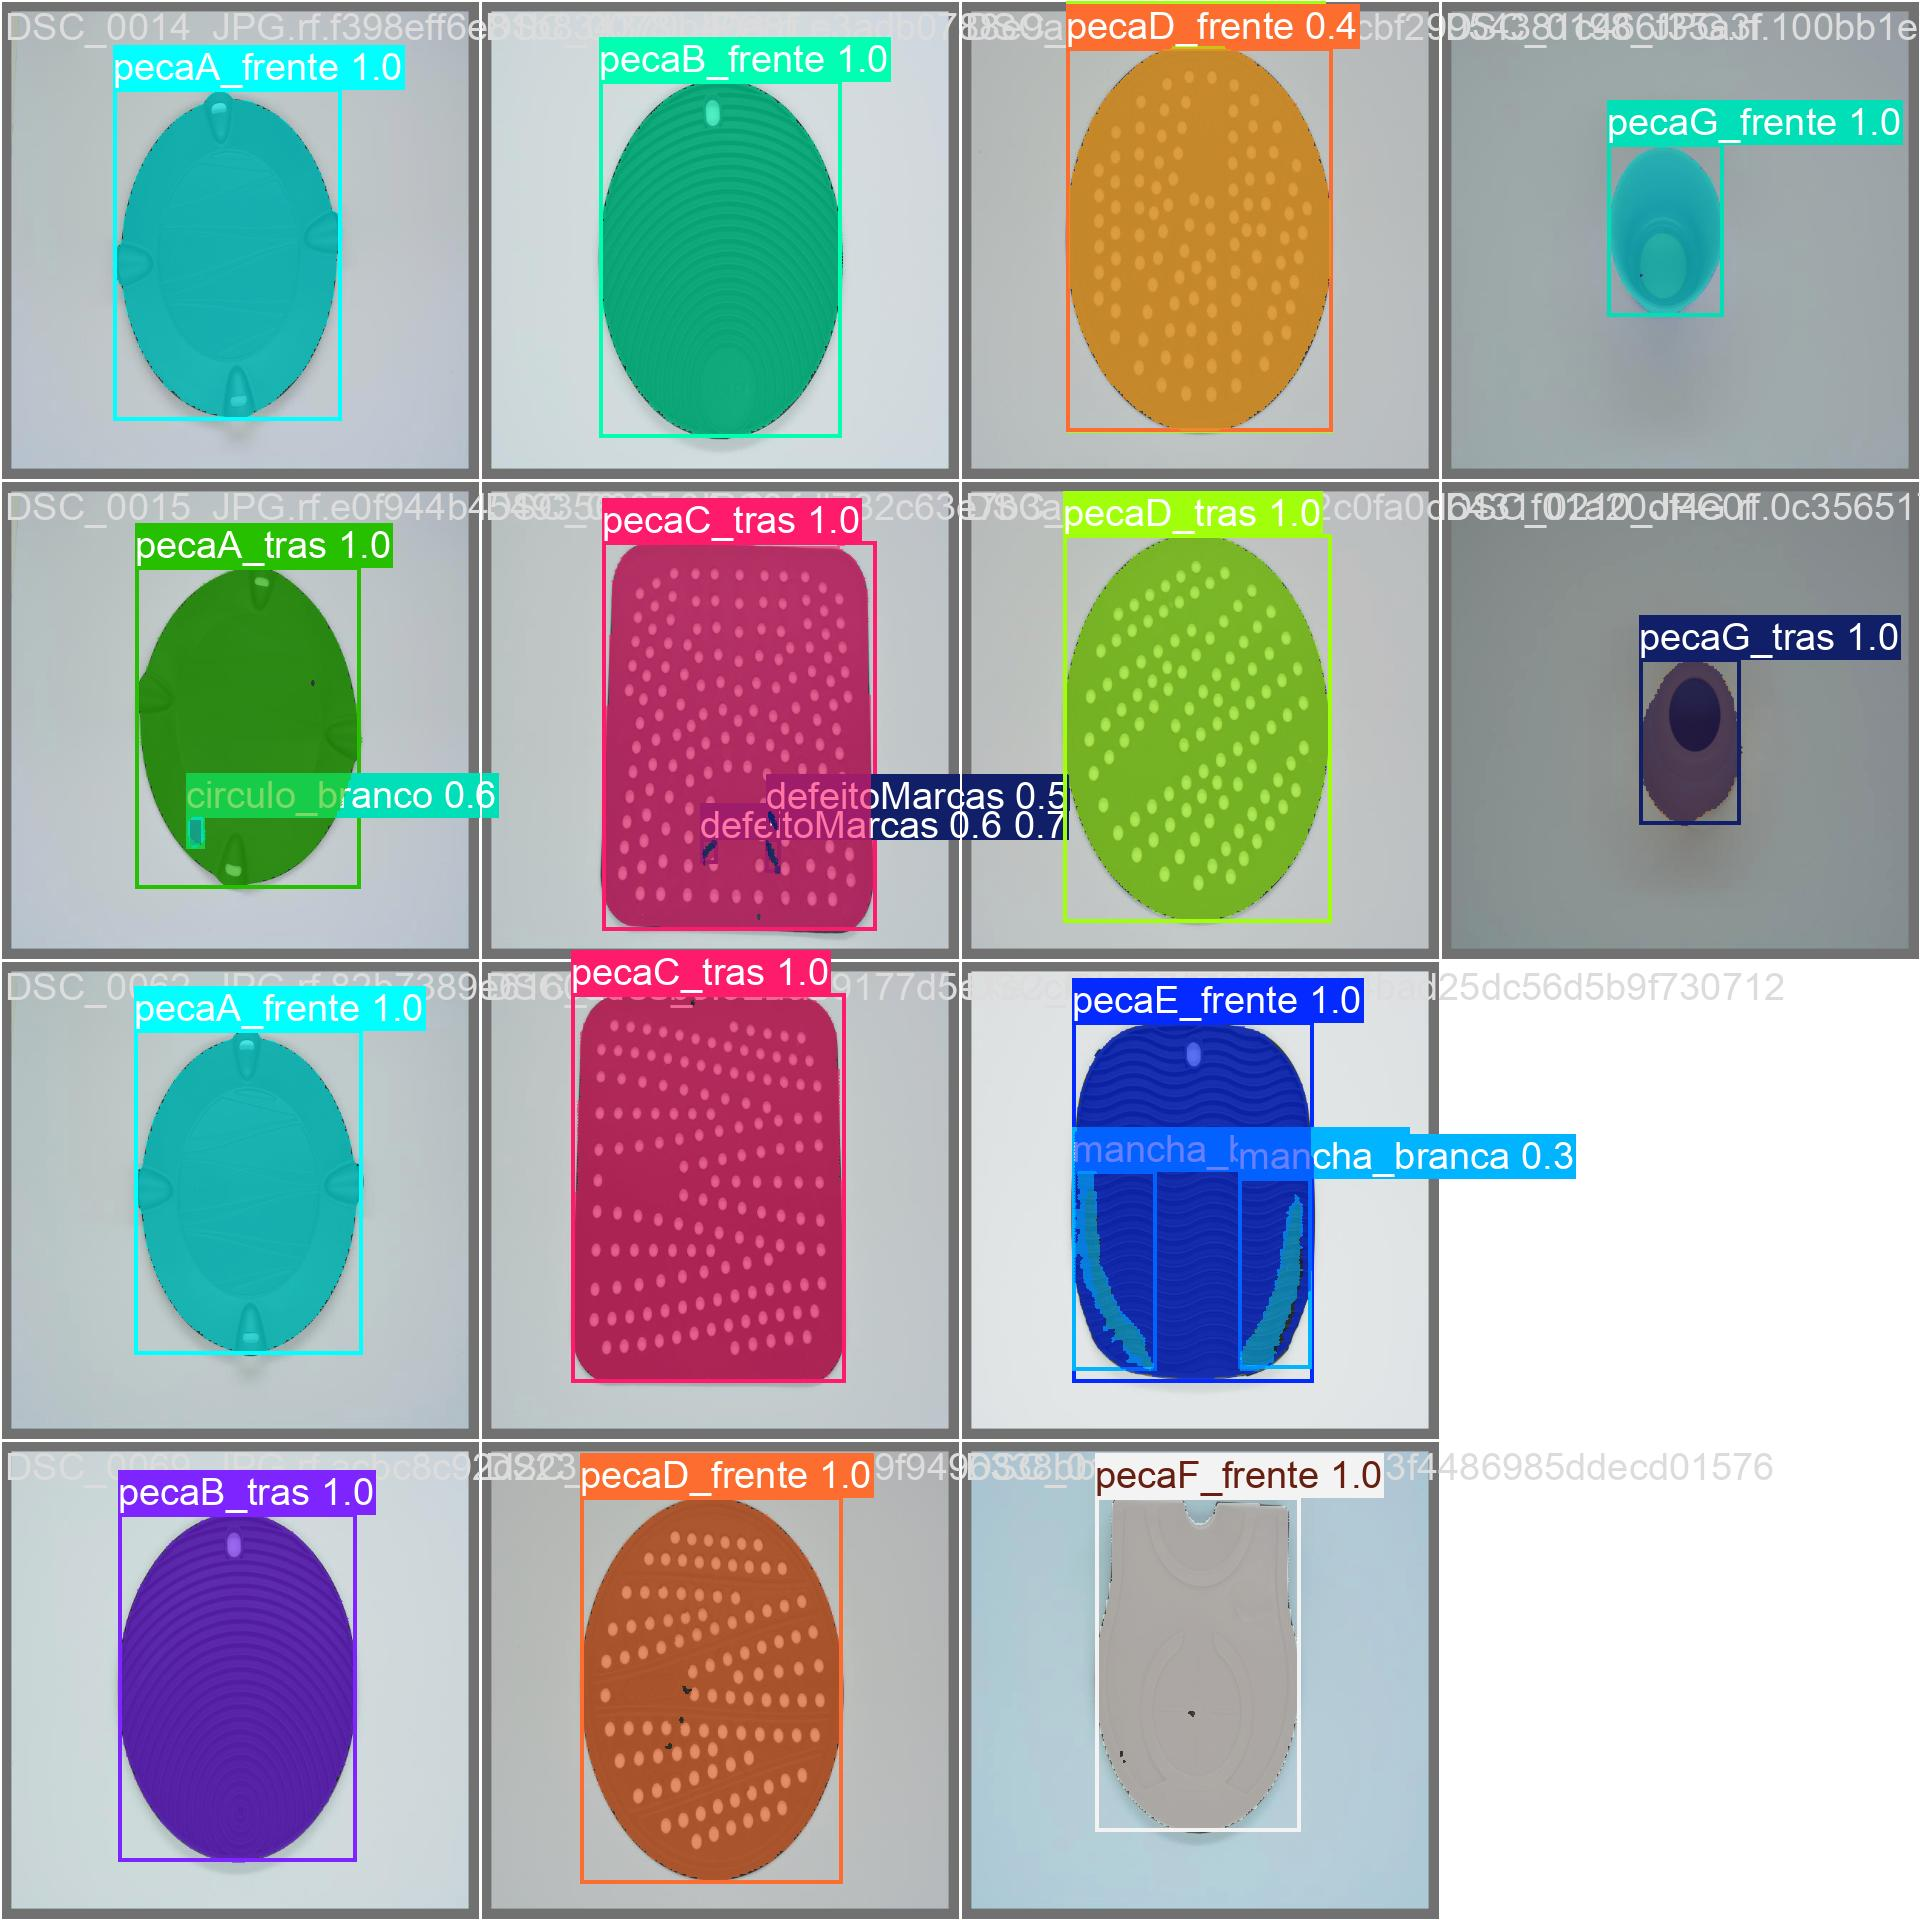

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

In [12]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,790,436 parameters, 0 gradients, 40.0 GFLOPs
val: Scanning /content/Detecção-de-Falhas-Em-Peças-1/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100% 14/14 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.88it/s]
                   all         14         61      0.787      0.573      0.582      0.541      0.787      0.573      0.594      0.541
           borrachinha          2         15          0          0          0          0          0          0          0          0
                buraco          4          4          1          0          0          0          1          0      0.249     0.0249
        circulo_branco          1          1       0.78          1      0.995      0.597       0.78        

In [13]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,790,436 parameters, 0 gradients, 40.0 GFLOPs

image 1/10 /content/Detecção-de-Falhas-Em-Peças-1/test/images/DSC_0009_JPG.rf.dcd0521ef8609e55bb8d500e93e2e5a6.jpg: 640x640 1 buraco, 1 pecaA_frente, 20.9ms
image 2/10 /content/Detecção-de-Falhas-Em-Peças-1/test/images/DSC_0023_JPG.rf.32a5b81d416c1f13ad759597f8802047.jpg: 640x640 1 buraco, 1 pecaA_frente, 20.9ms
image 3/10 /content/Detecção-de-Falhas-Em-Peças-1/test/images/DSC_0074_JPG.rf.a8e6f1ffa0ae0ffcc43a1143a744dffb.jpg: 640x640 1 pecaB_frente, 20.9ms
image 4/10 /content/Detecção-de-Falhas-Em-Peças-1/test/images/DSC_0101_JPG.rf.ddc6f33d6d1beebca70361301de3e40d.jpg: 640x640 1 pecaC_frente, 20.9ms
image 5/10 /content/Detecção-de-Falhas-Em-Peças-1/test/images/DSC_0136_JPG.rf.c8f7fe30a85819210610367b793ff091.jpg: 640x640 1 marca, 1 pecaD_frente, 20.9ms
image 6/10 /content/Detecção-de-Falhas-Em-Peças-1

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")